In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
#
#https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880
#
df = pd.read_csv("cases-among-vaccinated-207.csv", index_col=0)
df = df.fillna(0)
df = df.replace(['<5'],0)
#
#Set Language
language = "english" #german, else english
#
last_entry = df.index[-1] #Last Entry Date
#
if language == "german":
    s_titel1 = "Positive COVID-19 Fälle Israel (Gestapeltes Flächendiagramm)"
    s_subtitel1 = "Altersgruppen über 20 Jahre"
    s_subtitel2 = "Alle Altersgruppen"
    s_week = "Woche"
    s_xlbl1 = "Woche"
    s_fig2_suptitle = "COVID-19 Fälle Israel der letzten 10 Wochen"
    s_fig3_suptitle = "Verteilung positiver COVID-19 Fälle nach Impfstatus %s" %last_entry
    #
    s_1dose = "1. Dosis"
    s_2dose = "2. Dosis"
    s_3dose = "3. Dosis"
    s_unvac = "Nicht geimpft"
    #
    s_positive_1_6_days_after_1st_dose = "1-6 Tage nach 1. Dosis",
    s_positive_7_13_days_after_1st_dose = "7-13 Tage nach 1. Dosis",
    s_positive_14_20_days_after_1st_dose = "14-20 Tage nach 1. Dosis",
    s_positive_above_20_days_after_1st_dose = ">20 Tage nach 1. Dosis",
    s_positive_1_6_days_after_2nd_dose = "1-6 Tage nach 2. Dosis",
    s_positive_7_13_days_after_2nd_dose = "7-13 Tage nach 2. Dosis",
    s_positive_14_30_days_after_2nd_dose = "14-30 Tage nach 2. Dosis",
    s_positive_31_90_days_after_2nd_dose = "31-90 Tage nach 2. Dosis",
    s_positive_above_3_month_after_2nd_before_3rd_dose = ">90 Tage nach 2. Dosis",
    s_positive_1_6_days_after_3rd_dose = "1-6 Tage nach 3. Dosis",
    s_positive_7_13_days_after_3rd_dose = "7-13 Tage nach 3. Dosis",
    s_positive_14_30_days_after_3rd_dose = "14-30 Tage nach 3. Dosis",
    s_positive_31_90_days_after_3rd_dose = "31-90 Tage nach 3. Dosis",
    s_positive_above_90_days_after_3rd_dose = ">90 Tage nach 3. Dosis",
    s_Sum_positive_without_vaccination = "Nicht geimpft"
    #
    s_heatmap_title = "Heatmap: positive Fälle nach Impfstatus (Israel)"
    s_heatmap_adults_abs = "positive Fälle (absolut)\n Alle Altersgruppen über 20 Jahre"
    s_heatmap_adults_rel = "Wachstum zur Vorwoche (in %)\n Alle Altersgruppen über 20 Jahre"
    s_heatmap_all_abs = "positive Fälle (absolut)\n Alle Altersgruppen"
    s_heatmap_all_rel = "Wachstum zur Vorwoche (in %)\n Alle Altersgruppen"
    #
    s_source = "Quellendaten: https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880"
    #
else:
    s_titel1 = "Positive COVID-19 Cases Israel (Stacked Area Chart)"
    s_subtitel1 = "Age groups over 20 years"
    s_subtitel2 = "All Age groups"
    s_week = "Week"
    s_xlbl1 = "Week"
    s_fig2_suptitle = "COVID-19 Cases Israel of the last 10 weeks"
    s_fig3_suptitle = "Distribution of positive COVID-19 Cases by Vaccination status %s" %last_entry
    #
    s_1dose = "1st Dose"
    s_2dose = "2nd Dose"
    s_3dose = "3rd Dose"
    s_unvac = "Not vaccinated"
    #
    s_positive_1_6_days_after_1st_dose = "1-6 days after 1st dose",
    s_positive_7_13_days_after_1st_dose = "7-13 days after 1st dose",
    s_positive_14_20_days_after_1st_dose = "14-20 days after 1st dose",
    s_positive_above_20_days_after_1st_dose = ">20 days after 1st dose",
    s_positive_1_6_days_after_2nd_dose = "1-6 days after 2nd dose",
    s_positive_7_13_days_after_2nd_dose = "7-13 days after 2nd dose",
    s_positive_14_30_days_after_2nd_dose = "14-30 days after 2nd dose",
    s_positive_31_90_days_after_2nd_dose = "31-90 days after 2nd dose",
    s_positive_above_3_month_after_2nd_before_3rd_dose = ">90 days after 2nd dose",
    s_positive_1_6_days_after_3rd_dose = "1-6 days after 3rd dose",
    s_positive_7_13_days_after_3rd_dose = "7-13 days after 3rd dose",
    s_positive_14_30_days_after_3rd_dose = "14-30 days after 3rd dose",
    s_positive_31_90_days_after_3rd_dose = "31-90 days after 3rd dose",
    s_positive_above_90_days_after_3rd_dose = ">90 days after 3rd dose",
    s_Sum_positive_without_vaccination = "Not vaccinated",
    #
    s_heatmap_title = "Heatmap: positive Cases by Vaccination Status (Israel)"
    s_heatmap_adults_abs = "positive Cases (absolute)\n All Age Groups over 20 Years"
    s_heatmap_adults_rel = "Growth from previous week (in %)\n All Age Groups over 20 Years"
    s_heatmap_all_abs = "positive Cases (absolute)\n All Age Groups"
    s_heatmap_all_rel = "Growth from previous week (in %)\n All Age Groups"
    #
    s_source = "Source data: https://data.gov.il/dataset/covid-19/resource/9b623a64-f7df-4d0c-9f57-09bd99a88880"
    #
#
colors = ["azure", "lightcyan", "paleturquoise", "darkturquoise", 
          "lightblue", "skyblue", "lightskyblue", "deepskyblue", "dodgerblue",
          "plum","violet","orchid","m","purple",
          "orange"]
#
#
df.index.names = [s_week] #renames Index to s_week value
df_adults = df[df.Age_group != "0-19"] #remove age_group 0-19 and assign it to df_adults
#with pd.option_context("max_rows", None): #uncomment to show whole dataframe
#  display(df_adults)
#df_adults
#df

In [14]:
del df['Age_group'] #remove age_groups from dataframe
df = df.apply(pd.to_numeric) #turn everything to float
df = df.groupby(level=0).sum() #sum to weekly level
df.rename(columns={"positive_1_6_days_after_1st_dose": "%s" % s_positive_1_6_days_after_1st_dose,
                   "positive_7_13_days_after_1st_dose": "%s" % s_positive_7_13_days_after_1st_dose,
                   "positive_14_20_days_after_1st_dose": "%s" % s_positive_14_20_days_after_1st_dose,
                   "positive_above_20_days_after_1st_dose": "%s" % s_positive_above_20_days_after_1st_dose,
                   "positive_1_6_days_after_2nd_dose": "%s" % s_positive_1_6_days_after_2nd_dose,
                   "positive_7_13_days_after_2nd_dose": "%s" % s_positive_7_13_days_after_2nd_dose,
                   "positive_14_30_days_after_2nd_dose": "%s" % s_positive_14_30_days_after_2nd_dose,
                   "positive_31_90_days_after_2nd_dose": "%s" % s_positive_31_90_days_after_2nd_dose,
                   "positive_above_3_month_after_2nd_before_3rd_dose": "%s" % s_positive_above_3_month_after_2nd_before_3rd_dose,
                   "positive_1_6_days_after_3rd_dose": "%s" % s_positive_1_6_days_after_3rd_dose,
                   "positive_7_13_days_after_3rd_dose": "%s" % s_positive_7_13_days_after_3rd_dose,
                   "positive_14_30_days_after_3rd_dose": "%s" % s_positive_14_30_days_after_3rd_dose,
                   "positive_31_90_days_after_3rd_dose": "%s" % s_positive_31_90_days_after_3rd_dose,
                   "positive_above_90_days_after_3rd_dose": "%s" % s_positive_above_90_days_after_3rd_dose,
                   "Sum_positive_without_vaccination": "%s" % s_Sum_positive_without_vaccination,
                   }, inplace=True)
#df

In [15]:
del df_adults['Age_group']
df_adults = df_adults.apply(pd.to_numeric)
df_adults = df_adults.groupby(level=0).sum()
df_adults.rename(columns={"positive_1_6_days_after_1st_dose": "%s" % s_positive_1_6_days_after_1st_dose,
                   "positive_7_13_days_after_1st_dose": "%s" % s_positive_7_13_days_after_1st_dose,
                   "positive_14_20_days_after_1st_dose": "%s" % s_positive_14_20_days_after_1st_dose,
                   "positive_above_20_days_after_1st_dose": "%s" % s_positive_above_20_days_after_1st_dose,
                   "positive_1_6_days_after_2nd_dose": "%s" % s_positive_1_6_days_after_2nd_dose,
                   "positive_7_13_days_after_2nd_dose": "%s" % s_positive_7_13_days_after_2nd_dose,
                   "positive_14_30_days_after_2nd_dose": "%s" % s_positive_14_30_days_after_2nd_dose,
                   "positive_31_90_days_after_2nd_dose": "%s" % s_positive_31_90_days_after_2nd_dose,
                   "positive_above_3_month_after_2nd_before_3rd_dose": "%s" % s_positive_above_3_month_after_2nd_before_3rd_dose,
                   "positive_1_6_days_after_3rd_dose": "%s" % s_positive_1_6_days_after_3rd_dose,
                   "positive_7_13_days_after_3rd_dose": "%s" % s_positive_7_13_days_after_3rd_dose,
                   "positive_14_30_days_after_3rd_dose": "%s" % s_positive_14_30_days_after_3rd_dose,
                   "positive_31_90_days_after_3rd_dose": "%s" % s_positive_31_90_days_after_3rd_dose,
                   "positive_above_90_days_after_3rd_dose": "%s" % s_positive_above_90_days_after_3rd_dose,
                   "Sum_positive_without_vaccination": "%s" % s_Sum_positive_without_vaccination,
                   }, inplace=True)

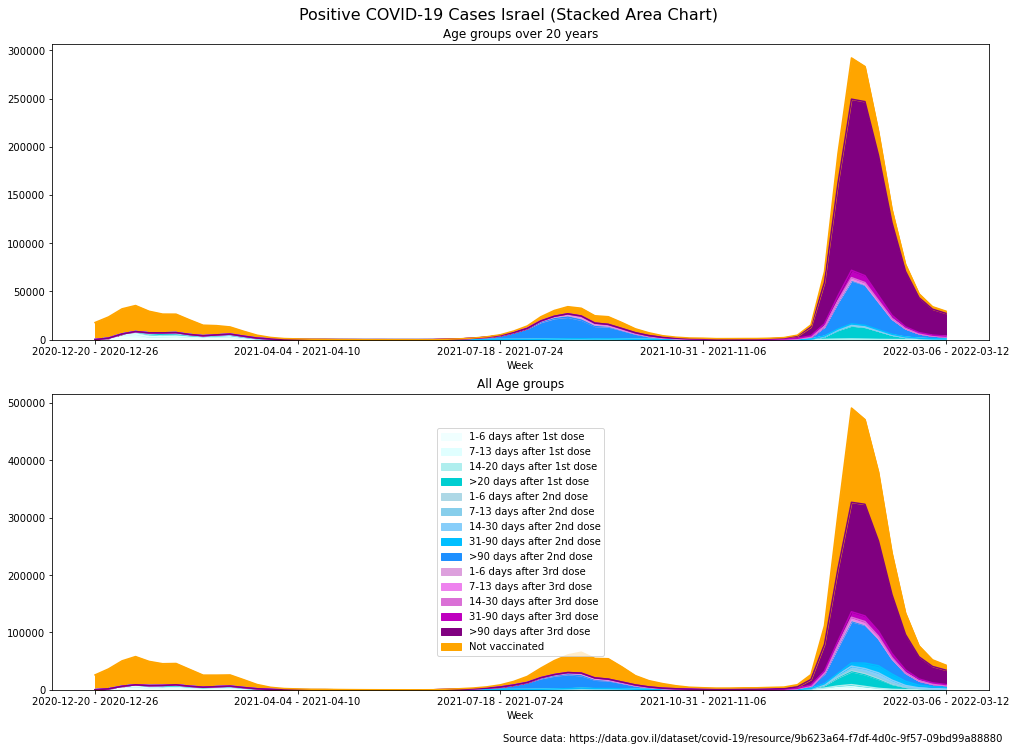

In [16]:
fig=plt.figure(figsize=(14,10),constrained_layout=True )
fig.suptitle(s_titel1, fontsize=16) #s_titel1
fig.tight_layout()
#
ax1=fig.add_subplot(211)
ax1.set_title(s_subtitel1) #s_subtitel1
#
ax2=fig.add_subplot(212)
ax2.set_title(s_subtitel2) #s_subtitel2
#
#
xtks = [0,15,30,45,63]
df_adults.plot.area(ax=ax1, color=colors, xlabel = s_week, xticks = xtks, legend=False)
df.plot.area(ax=ax2, color=colors, xlabel = s_xlbl1, xticks = xtks, legend=False)
plt.legend(loc='center')#, bbox_to_anchor=(1, 0.5))
plt.figtext(0.99, -0.025, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_detail_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

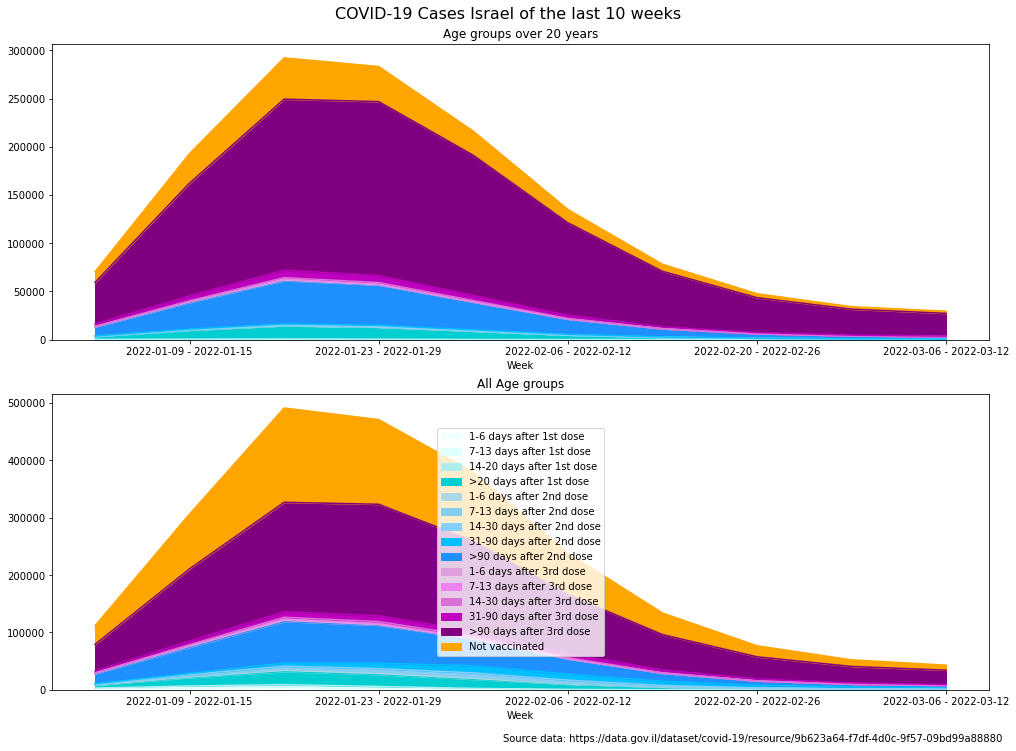

In [17]:
fig2=plt.figure(figsize=(14,10),constrained_layout=True )
fig2.suptitle(s_fig2_suptitle, fontsize=16)
fig2.tight_layout()

ax1=fig2.add_subplot(211)
ax1.set_title(s_subtitel1)
#
ax2=fig2.add_subplot(212)
ax2.set_title(s_subtitel2)
#
xtks = [1,3,5,7,9]
df_adults_recent = df_adults.tail(10)
df_recent = df.tail(10)
df_adults_recent.plot.area(ax=ax1, color=colors, xlabel = s_week, xticks = xtks, legend=False)
df_recent.plot.area(ax=ax2, color=colors, xlabel = s_xlbl1, xticks = xtks, legend=False)
plt.legend(loc='center')#, bbox_to_anchor=(1, 0.5))
plt.figtext(0.99, -0.025, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_detail_recent_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

In [18]:
#df_adults.tail()

In [19]:
sum_adults_first_shot = df_adults["%s" % s_positive_1_6_days_after_1st_dose] + df_adults["%s" % s_positive_7_13_days_after_1st_dose] + df_adults["%s" % s_positive_14_20_days_after_1st_dose] + df_adults["%s" % s_positive_above_20_days_after_1st_dose]
sum_adults_second_shot = df_adults["%s" % s_positive_1_6_days_after_2nd_dose] + df_adults["%s" % s_positive_7_13_days_after_2nd_dose] + df_adults["%s" % s_positive_14_30_days_after_2nd_dose] + df_adults["%s" % s_positive_31_90_days_after_2nd_dose] + df_adults["%s" % s_positive_above_3_month_after_2nd_before_3rd_dose]
sum_adults_third_shot = df_adults["%s" % s_positive_1_6_days_after_3rd_dose] + df_adults["%s" % s_positive_7_13_days_after_3rd_dose] + df_adults["%s" % s_positive_14_30_days_after_3rd_dose] + df_adults["%s" % s_positive_31_90_days_after_3rd_dose] + df_adults["%s" % s_positive_above_90_days_after_3rd_dose]
sum_adults_unvaccinated = df_adults["%s" % s_Sum_positive_without_vaccination]
#
df_sum_adults = pd.DataFrame()
df_sum_adults[s_1dose] = sum_adults_first_shot
df_sum_adults[s_2dose] = sum_adults_second_shot
df_sum_adults[s_3dose] = sum_adults_third_shot
df_sum_adults[s_unvac] = sum_adults_unvaccinated
#
df_sum_adults_no1d = df_sum_adults.drop(s_1dose, 1)
#
df_sum_adults.tail(10)

/var/folders/1r/4szl0y752x5dpjm5hqkghhlw0000gn/T/ipykernel_67722/2195496600.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_sum_adults_no1d = df_sum_adults.drop(s_1dose, 1)


,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2022-01-02 - 2022-01-08,3409.0,9895.0,46093.0,11076
2022-01-09 - 2022-01-15,9892.0,28718.0,123805.0,30626
2022-01-16 - 2022-01-22,14414.0,46777.0,188326.0,42785
2022-01-23 - 2022-01-29,13001.0,43771.0,190189.0,36418
2022-01-30 - 2022-02-05,8939.0,30175.0,152238.0,24944
2022-02-06 - 2022-02-12,4856.0,16563.0,99935.0,13778
2022-02-13 - 2022-02-19,2545.0,8840.0,59614.0,7308
2022-02-20 - 2022-02-26,1357.0,4914.0,37333.0,4116
2022-02-27 - 2022-03-05,876.0,3176.0,27605.0,2607


In [20]:
df_sum_adults.tail(10).pct_change()

,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2022-01-02 - 2022-01-08,NaN,NaN,NaN,NaN
2022-01-09 - 2022-01-15,1.901731,1.902274,1.685983,1.765078
2022-01-16 - 2022-01-22,0.457137,0.628839,0.521150,0.397016
2022-01-23 - 2022-01-29,-0.098030,-0.064262,0.009892,-0.148814
2022-01-30 - 2022-02-05,-0.312438,-0.310617,-0.199544,-0.315064
2022-02-06 - 2022-02-12,-0.456763,-0.451102,-0.343561,-0.447643
2022-02-13 - 2022-02-19,-0.475906,-0.466280,-0.403472,-0.469589
2022-02-20 - 2022-02-26,-0.466798,-0.444118,-0.373754,-0.436782
2022-02-27 - 2022-03-05,-0.354458,-0.353683,-0.260574,-0.366618


In [21]:
sum_all_first_shot = df["%s" % s_positive_1_6_days_after_1st_dose] + df["%s" % s_positive_7_13_days_after_1st_dose] + df["%s" % s_positive_14_20_days_after_1st_dose] + df["%s" % s_positive_above_20_days_after_1st_dose]
sum_all_second_shot = df["%s" % s_positive_1_6_days_after_2nd_dose] + df["%s" % s_positive_7_13_days_after_2nd_dose] + df["%s" % s_positive_14_30_days_after_2nd_dose] + df["%s" % s_positive_31_90_days_after_2nd_dose] + df["%s" % s_positive_above_3_month_after_2nd_before_3rd_dose]
sum_all_third_shot = df["%s" % s_positive_1_6_days_after_3rd_dose] + df["%s" % s_positive_7_13_days_after_3rd_dose] + df["%s" % s_positive_14_30_days_after_3rd_dose] + df["%s" % s_positive_31_90_days_after_3rd_dose] + df["%s" % s_positive_above_90_days_after_3rd_dose]
sum_all_unvaccinated = df["%s" % s_Sum_positive_without_vaccination]
#
df_sum_all = pd.DataFrame()
df_sum_all[s_1dose] = sum_all_first_shot
df_sum_all[s_2dose] = sum_all_second_shot
df_sum_all[s_3dose] = sum_all_third_shot
df_sum_all[s_unvac] = sum_all_unvaccinated
#
df_sum_all_no1d = df_sum_all.drop(s_1dose, 1)
#
df_sum_all.tail(10)

/var/folders/1r/4szl0y752x5dpjm5hqkghhlw0000gn/T/ipykernel_67722/3780295814.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_sum_all_no1d = df_sum_all.drop(s_1dose, 1)


,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2022-01-02 - 2022-01-08,7970.0,20140.0,51052.0,32505
2022-01-09 - 2022-01-15,21236.0,52838.0,136834.0,95514
2022-01-16 - 2022-01-22,31827.0,87248.0,207865.0,164456
2022-01-23 - 2022-01-29,26587.0,86027.0,210916.0,147727
2022-01-30 - 2022-02-05,18280.0,70441.0,170778.0,120322
2022-02-06 - 2022-02-12,9588.0,44383.0,112083.0,72533
2022-02-13 - 2022-02-19,4721.0,24399.0,67268.0,37681
2022-02-20 - 2022-02-26,2479.0,13049.0,42049.0,19218
2022-02-27 - 2022-03-05,1528.0,8434.0,30801.0,11542


In [22]:
df_sum_all.tail(10).pct_change()

,1st Dose,2nd Dose,3rd Dose,Not vaccinated
Week,,,,
2022-01-02 - 2022-01-08,NaN,NaN,NaN,NaN
2022-01-09 - 2022-01-15,1.664492,1.623535,1.680287,1.938440
2022-01-16 - 2022-01-22,0.498729,0.651236,0.519103,0.721800
2022-01-23 - 2022-01-29,-0.164640,-0.013995,0.014678,-0.101723
2022-01-30 - 2022-02-05,-0.312446,-0.181176,-0.190303,-0.185511
2022-02-06 - 2022-02-12,-0.475492,-0.369927,-0.343692,-0.397176
2022-02-13 - 2022-02-19,-0.507614,-0.450262,-0.399838,-0.480499
2022-02-20 - 2022-02-26,-0.474899,-0.465183,-0.374903,-0.489982
2022-02-27 - 2022-03-05,-0.383622,-0.353667,-0.267497,-0.399417


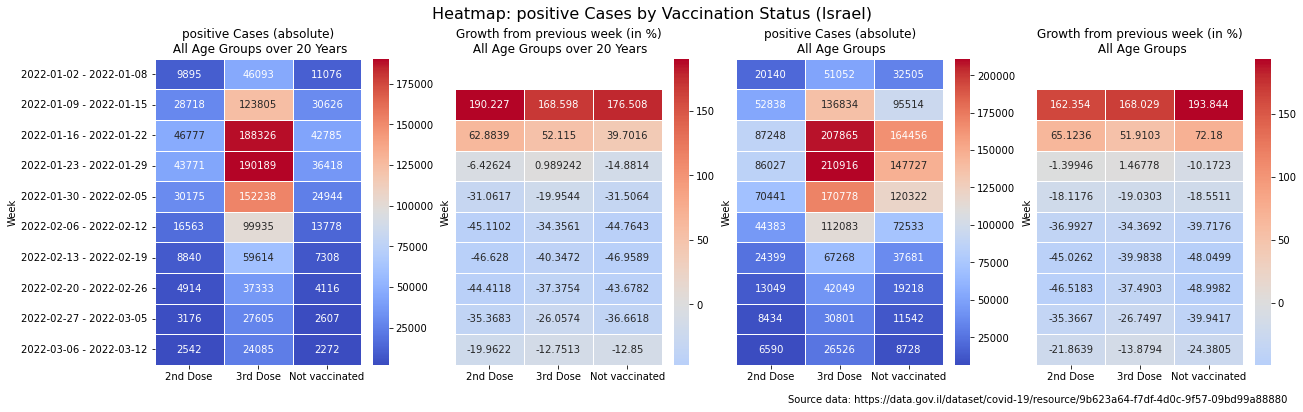

In [23]:
fig4=plt.figure(figsize=(18,5),constrained_layout=True)
fig4.suptitle(s_heatmap_title, fontsize=16, y=1.05)
#
df_h = df_sum_adults_no1d.tail(10)
df_h2 = df_sum_adults_no1d.tail(10).pct_change().mul(100)
#
df_h3 = df_sum_all_no1d.tail(10)
df_h4 = df_sum_all_no1d.tail(10).pct_change().mul(100)
#
ax10=fig4.add_subplot(141)
ax10.set_title(s_heatmap_adults_abs)
#
ax11=fig4.add_subplot(142)
ax11.set_title(s_heatmap_adults_rel)
#
ax12=fig4.add_subplot(143)
ax12.set_title(s_heatmap_all_abs)
#
ax13=fig4.add_subplot(144)
ax13.set_title(s_heatmap_all_rel)
#
#
sb.heatmap(df_h, ax=ax10, cmap="coolwarm", linewidths=0.5, annot=True, fmt="g")
sb.heatmap(df_h2, ax=ax11, cmap="coolwarm", yticklabels=False, center=0.00, annot=True, fmt="g", linewidths=0.5)
sb.heatmap(df_h3, ax=ax12, cmap="coolwarm", linewidths=0.5, yticklabels=False, annot=True, fmt="g")
sb.heatmap(df_h4, ax=ax13, cmap="coolwarm", yticklabels=False, center=0.00, annot=True, linewidths=0.5, fmt="g")
#plt.show()
plt.figtext(0.99, -0.05, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_heatmap_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')

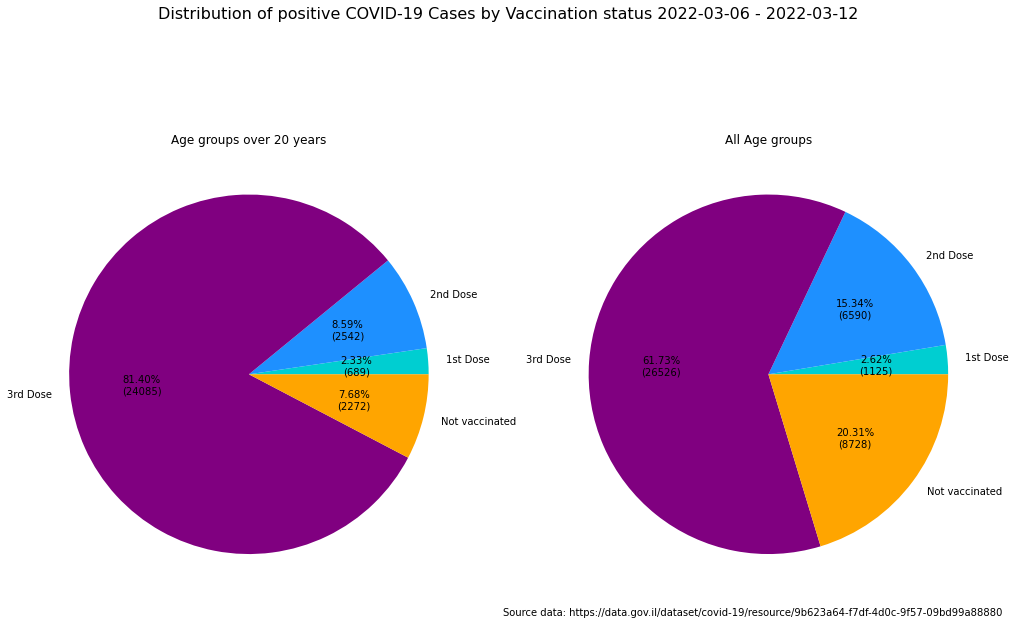

In [24]:
#
fig3=plt.figure(figsize=(14,10),constrained_layout=True)
fig3.suptitle(s_fig3_suptitle, fontsize=16)
#fig3.tight_layout()
ax5=fig3.add_subplot(121)
ax5.set_title(s_subtitel1)
#
ax6=fig3.add_subplot(122)
ax6.set_title(s_subtitel2)
#
abs_adults = df_sum_adults.iloc[-1]
abs_all = df_sum_all.iloc[-1]
#
pie_colors = ["darkturquoise","dodgerblue","purple","orange"]
#
df_sum_adults.iloc[-1].plot.pie(ax=ax5, colors=pie_colors,
                               autopct=lambda x: "{:.2f}%\n({:.0f})".format(x, x*abs_adults.sum()/100),ylabel="")
df_sum_all.iloc[-1].plot.pie(ax=ax6, colors=pie_colors,
                             autopct=lambda x: "{:.2f}%\n({:.0f})".format(x, x*abs_all.sum()/100),ylabel="")
plt.figtext(0.99, 0.15, s_source, horizontalalignment='right')
plt.savefig("israel_stacked_piechart_%s.jpg" %language, format='jpg',dpi=150, bbox_inches='tight')
#df_sum_adults.index[-1]